
# 01- Assignment


### 1) Successfully downloaded Simio and Python

I have downloaded Simio and Python 

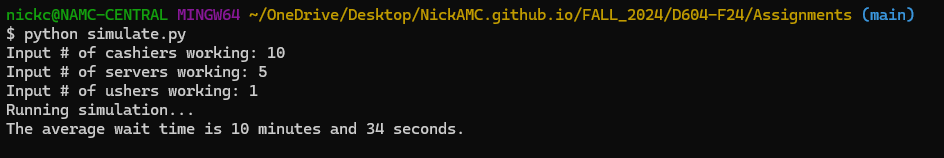

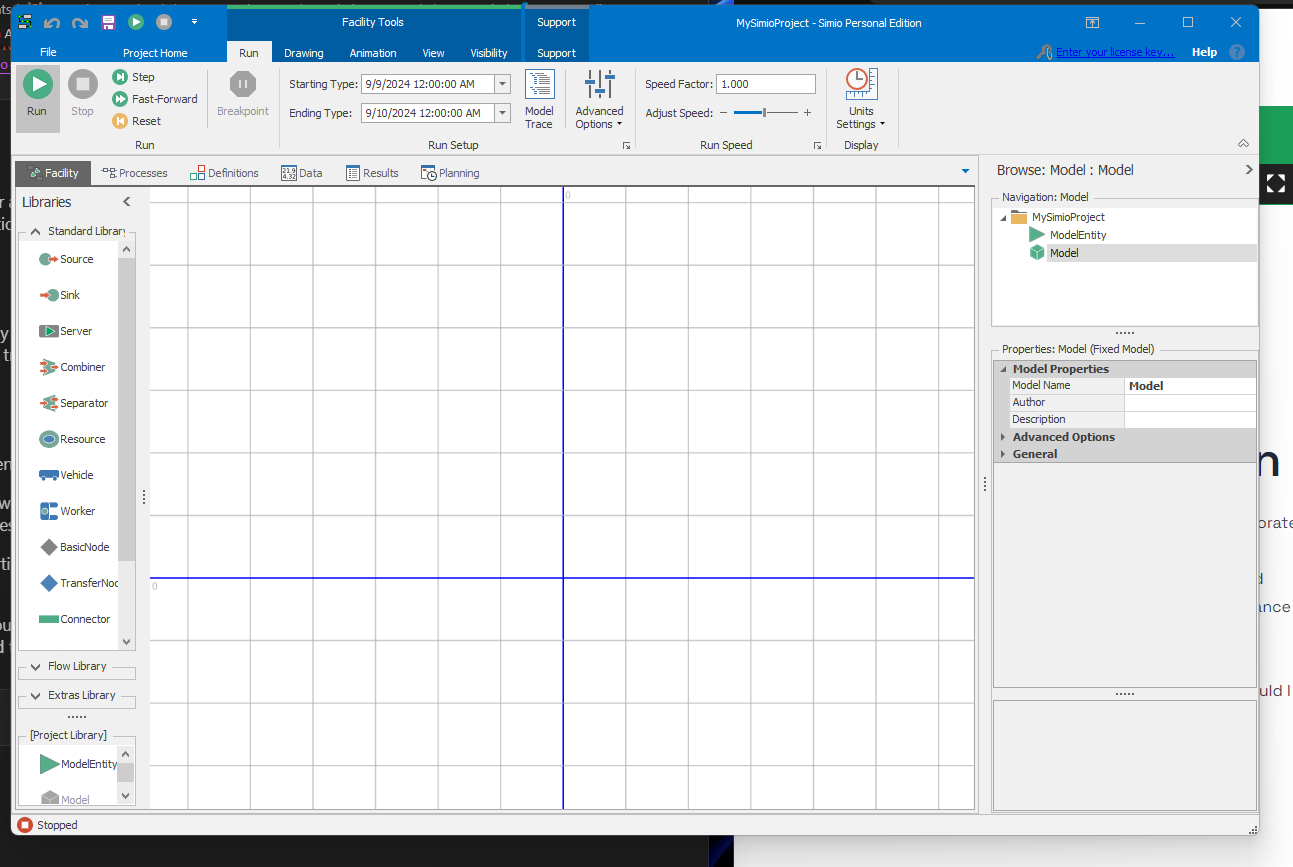


### 2) Guided Tutorial on Simpy 

https://realpython.com/simpy-simulating-with-python/#what-simulation-is


In [45]:
import random
import statistics

import simpy

wait_times = []


class Theater(object):
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers)
        self.server = simpy.Resource(env, num_servers)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))


def go_to_movies(env, moviegoer, theater):
    # Moviegoer arrives at the theater
    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer))

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    if random.choice([True, False]):
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    # Moviegoer heads into the theater
    wait_times.append(env.now - arrival_time)


def run_theater(env, num_cashiers, num_servers, num_ushers):
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(3):
        env.process(go_to_movies(env, moviegoer, theater))

    while True:
        yield env.timeout(0.20)  # Wait a bit before generating a new person

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))


def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)


def get_user_input():
    num_cashiers = input("Input # of cashiers working: ")
    num_servers = input("Input # of servers working: ")
    num_ushers = input("Input # of ushers working: ")
    params = [num_cashiers, num_servers, num_ushers]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. Simulation will use default values:",
            "\n1 cashier, 1 server, 1 usher.",
        )
        params = [1, 1, 1]
    return params


def main():
    # Setup
    random.seed(42)
    num_cashiers, num_servers, num_ushers = get_user_input()

    # Run the simulation
    env = simpy.Environment()
    env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
    env.run(until=90)

    # View the results
    mins, secs = get_average_wait_time(wait_times)
    print(
        "Running simulation...",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
    )


if __name__ == "__main__":
    main()


Running simulation... 
The average wait time is 4 minutes and 12 seconds.


Inputs:10 cashiers, 10 servers and 2 usher


###  3) Simio Case Study

[Deciding Where To Build A New Distribution Center](https://www.simio.com/projects/deciding-where-to-build-a-new-distribution-center/)

#### Problem: 

A company is looking for a new location to build an additional distribution center. They want to assess the most cost effective location in relation to the existing distribution center.

#### Solution:

Students at the University of Pittsburgh used Simio to simulate the truck route, while considering these factors: weekly replenishment schedule, travel time, mileage, and pre-selected truck routes.

#### Result:

If the new distribution center is built in Akron, OH:

* 12% of the yearly hours worked would be overtime

* 1,234,199 yearly vehicle miles

* A yearly logistic cost of $1,703,195

To build in Grove City, OH results in:

* 18% of the hours in overtime

* 1,491,493 yearly vehicle miles

* $2,085,260 in yearly operating costs

Building in Sharonville, OH would result in:

* 29% of the total work hours being overtime hours

* 1,754,339 yearly vehicle miles

* $2,420,988 yearly operating costs

The simulation demonstrated that Akron will be the best location to build.

#### Short essay

Other factors to build a stronger and more accurate model is to consider the local work force availability. The company must survey the whether or not the local population already possesses the skills required to operate a distribution center. If the local workforce lacks the skills then the company must bring in workers from other regions to operate and possibly train the local workers which would increase the operating costs. Conversely, if the local workforce already possesses the required skills then the company will not have to bring workers from other regions and this would lower operating costs for the distribution center. The company could quantify this data with the local population's average age and of those local worker how many of them has a high school degree, undergraduate degree, or trade school degree. Implementing this component in the simulation can display a more comprehensive understanding of the potential location. 

Another factor to consider in this simulation model is the current infrastructure in the area. The model can simulate whether the company has to build a distribution center from the ground or if there exists infrastructure such as empty warehouses or distribution centers from defunct companies. Using these building would greater reduce the cost and time to set up a new distribution center. The infrastructure data of the region could be passed into the model where it would assess the most cost effective and optimal location to place a distribution center.

With these additional factors, data on local workforce and current infrastructure, the model becomes more comprehensive and possibly offer a more accurate projection of the costs and logistics of setting up a new distribution center. Ultimately, this model would supply important information to the company's decision makers e.g. the executives. 